In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [3]:
# Dataframe
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [4]:
goodreads_book = pd.read_excel('meta_dataset.xlsx')

In [5]:
goodreads_book

,Unnamed: 0,book_id,text_reviews_count,average_rating,description,link,authors,publication_year,url,image_url,ratings_count,title,title_without_series,language
0,0,19398490,2311,4.31,Winner of the Pulitzer Prize\nFrom the highly ...,https://www.goodreads.com/book/show/19398490-a...,"[{'author_id': '28186', 'role': ''}]",2014.0,https://www.goodreads.com/book/show/19398490-a...,https://images.gr-assets.com/books/1440903901m...,53342,All the Light We Cannot See,All the Light We Cannot See,en
1,1,12969594,241,4.06,An alternate cover of this ASIN can be found ...,https://www.goodreads.com/book/show/12969594-t...,"[{'author_id': '36615', 'role': ''}]",2012.0,https://www.goodreads.com/book/show/12969594-t...,https://images.gr-assets.com/books/1328309680m...,6390,The Orphan Master's Son,The Orphan Master's Son,en
2,2,8664353,38878,4.39,"In her long-awaited new book, Laura Hillenbran...",https://www.goodreads.com/book/show/8664353-un...,"[{'author_id': '30913', 'role': ''}]",2010.0,https://www.goodreads.com/book/show/8664353-un...,https://images.gr-assets.com/books/1327861115m...,504961,"Unbroken: A World War II Story of Survival, Re...","Unbroken: A World War II Story of Survival, Re...",en
3,3,6452796,2930,3.95,Forget everything you thought you knew about h...,https://www.goodreads.com/book/show/6452796-drive,"[{'author_id': '96150', 'role': ''}]",2009.0,https://www.goodreads.com/book/show/6452796-drive,https://s.gr-assets.com/assets/nophoto/book/11...,58428,Drive: The Surprising Truth About What Motivat...,Drive: The Surprising Truth About What Motivat...,en
4,4,178186,26,3.87,An autobiographical memoir revealing the tradi...,https://www.goodreads.com/book/show/178186.The...,"[{'author_id': '103752', 'role': ''}]",1988.0,https://www.goodreads.com/book/show/178186.The...,https://s.gr-assets.com/assets/nophoto/book/11...,245,The Worlds of a Maasai Warrior: An Autobiography,The Worlds of a Maasai Warrior: An Autobiography,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24010,101220,23228256,28,4.09,"From Brazil's most acclaimed young novelist, t...",https://www.goodreads.com/book/show/23228256-b...,"[{'author_id': '1169290', 'role': ''}, {'autho...",2015.0,https://www.goodreads.com/book/show/23228256-b...,https://images.gr-assets.com/books/1411183144m...,159,Blood-Drenched Beard,Blood-Drenched Beard,en
24011,101227,30340824,45,4.33,Ten seconds can change everything.\nDaisy Conn...,https://www.goodreads.com/book/show/30340824-c...,"[{'author_id': '3975855', 'role': ''}]",2016.0,https://www.goodreads.com/book/show/30340824-c...,https://images.gr-assets.com/books/1464920539m...,68,"Collateral Damage (Hidden Scars, #2)","Collateral Damage (Hidden Scars, #2)",en
24012,101228,33125385,29,4.40,Librarian Note: Alternate Cover Edition for ....,https://www.goodreads.com/book/show/33125385-u...,"[{'author_id': '8577407', 'role': ''}]",2014.0,https://www.goodreads.com/book/show/33125385-u...,https://images.gr-assets.com/books/1480090010m...,93,Untouched (Untouched #1),Untouched (Untouched #1),en
24013,101248,22798607,3,3.90,"In his debut collection, Christian Winn throws...",https://www.goodreads.com/book/show/22798607-n...,"[{'author_id': '8409842', 'role': ''}]",2014.0,https://www.goodreads.com/book/show/22798607-n...,https://images.gr-assets.com/books/1417750817m...,21,Naked Me,Naked Me,en


In [6]:
goodreads_book.columns

Index(['Unnamed: 0', 'book_id', 'text_reviews_count', 'average_rating',
       'description', 'link', 'authors', 'publication_year', 'url',
       'image_url', 'ratings_count', 'title', 'title_without_series',
       'language'],
      dtype='object')

## Data Cleaning

In [7]:
goodreads_book=goodreads_book.drop(['Unnamed: 0','publication_year'],axis=1)

In [8]:
goodreads_book.head(3)

,book_id,text_reviews_count,average_rating,description,link,authors,url,image_url,ratings_count,title,title_without_series,language
0,19398490,2311,4.31,Winner of the Pulitzer Prize\nFrom the highly ...,https://www.goodreads.com/book/show/19398490-a...,"[{'author_id': '28186', 'role': ''}]",https://www.goodreads.com/book/show/19398490-a...,https://images.gr-assets.com/books/1440903901m...,53342,All the Light We Cannot See,All the Light We Cannot See,en
1,12969594,241,4.06,An alternate cover of this ASIN can be found ...,https://www.goodreads.com/book/show/12969594-t...,"[{'author_id': '36615', 'role': ''}]",https://www.goodreads.com/book/show/12969594-t...,https://images.gr-assets.com/books/1328309680m...,6390,The Orphan Master's Son,The Orphan Master's Son,en
2,8664353,38878,4.39,"In her long-awaited new book, Laura Hillenbran...",https://www.goodreads.com/book/show/8664353-un...,"[{'author_id': '30913', 'role': ''}]",https://www.goodreads.com/book/show/8664353-un...,https://images.gr-assets.com/books/1327861115m...,504961,"Unbroken: A World War II Story of Survival, Re...","Unbroken: A World War II Story of Survival, Re...",en


In [9]:
goodreads_book.head().transpose()

,0,1,2,3,4
book_id,19398490,12969594,8664353,6452796,178186
text_reviews_count,2311,241,38878,2930,26
average_rating,4.31,4.06,4.39,3.95,3.87
description,Winner of the Pulitzer Prize\nFrom the highly ...,An alternate cover of this ASIN can be found ...,"In her long-awaited new book, Laura Hillenbran...",Forget everything you thought you knew about h...,An autobiographical memoir revealing the tradi...
link,https://www.goodreads.com/book/show/19398490-a...,https://www.goodreads.com/book/show/12969594-t...,https://www.goodreads.com/book/show/8664353-un...,https://www.goodreads.com/book/show/6452796-drive,https://www.goodreads.com/book/show/178186.The...
authors,"[{'author_id': '28186', 'role': ''}]","[{'author_id': '36615', 'role': ''}]","[{'author_id': '30913', 'role': ''}]","[{'author_id': '96150', 'role': ''}]","[{'author_id': '103752', 'role': ''}]"
url,https://www.goodreads.com/book/show/19398490-a...,https://www.goodreads.com/book/show/12969594-t...,https://www.goodreads.com/book/show/8664353-un...,https://www.goodreads.com/book/show/6452796-drive,https://www.goodreads.com/book/show/178186.The...
image_url,https://images.gr-assets.com/books/1440903901m...,https://images.gr-assets.com/books/1328309680m...,https://images.gr-assets.com/books/1327861115m...,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/11...
ratings_count,53342,6390,504961,58428,245
title,All the Light We Cannot See,The Orphan Master's Son,"Unbroken: A World War II Story of Survival, Re...",Drive: The Surprising Truth About What Motivat...,The Worlds of a Maasai Warrior: An Autobiography


In [10]:
goodreads_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24015 entries, 0 to 24014
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   book_id               24015 non-null  int64  
 1   text_reviews_count    24015 non-null  int64  
 2   average_rating        24015 non-null  float64
 3   description           24015 non-null  object 
 4   link                  24015 non-null  object 
 5   authors               24015 non-null  object 
 6   url                   24015 non-null  object 
 7   image_url             24015 non-null  object 
 8   ratings_count         24015 non-null  int64  
 9   title                 24015 non-null  object 
 10  title_without_series  24015 non-null  object 
 11  language              24015 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 2.2+ MB


In [11]:
goodreads_book.describe()

,book_id,text_reviews_count,average_rating,ratings_count
count,2.401500e+04,24015.000000,24015.000000,24015.000000
mean,1.425268e+07,76.638934,3.897751,1024.398959
std,1.086071e+07,504.830494,0.379555,10099.925052
min,2.280000e+02,0.000000,0.000000,0.000000
25%,2.403230e+06,5.000000,3.680000,24.000000
50%,1.458705e+07,16.000000,3.920000,90.000000
75%,2.326101e+07,46.000000,4.140000,360.000000
max,3.646933e+07,38878.000000,5.000000,748926.000000


# Author Dataset Cleaning

In [12]:
single_row=goodreads_book['authors'].iloc[1]

In [13]:
single_row

"[{'author_id': '36615', 'role': ''}]"

In [14]:
single_row=single_row.replace('[','')
single_row=single_row.replace(']','')



In [15]:
dict2 = eval(single_row)

In [16]:
type(dict2)

dict

In [17]:
dict2

{'author_id': '36615', 'role': ''}

In [18]:
#dict2[2]['author_id']

In [19]:
def author_list(text):
    text=text.replace('[','')
    text=text.replace(']','')
    dic=eval(text)
    if((str(dic).count('author_id'))==1):
      new=dic['author_id']
    elif((str(dic).count('author_id'))>1):
      new=dic[0]['author_id']
    else:
      new='NIL'
    #nn=dict((key,d[key]) for d in new for key in d)
    #print(nn)
    return new

In [20]:
author_list(goodreads_book['authors'].iloc[5])

'3618'

In [21]:
goodreads_book['author_id']=goodreads_book['authors'].apply(author_list)

In [22]:
goodreads_book['author_id']

0          28186
1          36615
2          30913
3          96150
4         103752
          ...   
24010    1169290
24011    3975855
24012    8577407
24013    8409842
24014    4952802
Name: author_id, Length: 24015, dtype: object

In [23]:
goodreads_book

,book_id,text_reviews_count,average_rating,description,link,authors,url,image_url,ratings_count,title,title_without_series,language,author_id
0,19398490,2311,4.31,Winner of the Pulitzer Prize\nFrom the highly ...,https://www.goodreads.com/book/show/19398490-a...,"[{'author_id': '28186', 'role': ''}]",https://www.goodreads.com/book/show/19398490-a...,https://images.gr-assets.com/books/1440903901m...,53342,All the Light We Cannot See,All the Light We Cannot See,en,28186
1,12969594,241,4.06,An alternate cover of this ASIN can be found ...,https://www.goodreads.com/book/show/12969594-t...,"[{'author_id': '36615', 'role': ''}]",https://www.goodreads.com/book/show/12969594-t...,https://images.gr-assets.com/books/1328309680m...,6390,The Orphan Master's Son,The Orphan Master's Son,en,36615
2,8664353,38878,4.39,"In her long-awaited new book, Laura Hillenbran...",https://www.goodreads.com/book/show/8664353-un...,"[{'author_id': '30913', 'role': ''}]",https://www.goodreads.com/book/show/8664353-un...,https://images.gr-assets.com/books/1327861115m...,504961,"Unbroken: A World War II Story of Survival, Re...","Unbroken: A World War II Story of Survival, Re...",en,30913
3,6452796,2930,3.95,Forget everything you thought you knew about h...,https://www.goodreads.com/book/show/6452796-drive,"[{'author_id': '96150', 'role': ''}]",https://www.goodreads.com/book/show/6452796-drive,https://s.gr-assets.com/assets/nophoto/book/11...,58428,Drive: The Surprising Truth About What Motivat...,Drive: The Surprising Truth About What Motivat...,en,96150
4,178186,26,3.87,An autobiographical memoir revealing the tradi...,https://www.goodreads.com/book/show/178186.The...,"[{'author_id': '103752', 'role': ''}]",https://www.goodreads.com/book/show/178186.The...,https://s.gr-assets.com/assets/nophoto/book/11...,245,The Worlds of a Maasai Warrior: An Autobiography,The Worlds of a Maasai Warrior: An Autobiography,en,103752
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24010,23228256,28,4.09,"From Brazil's most acclaimed young novelist, t...",https://www.goodreads.com/book/show/23228256-b...,"[{'author_id': '1169290', 'role': ''}, {'autho...",https://www.goodreads.com/book/show/23228256-b...,https://images.gr-assets.com/books/1411183144m...,159,Blood-Drenched Beard,Blood-Drenched Beard,en,1169290
24011,30340824,45,4.33,Ten seconds can change everything.\nDaisy Conn...,https://www.goodreads.com/book/show/30340824-c...,"[{'author_id': '3975855', 'role': ''}]",https://www.goodreads.com/book/show/30340824-c...,https://images.gr-assets.com/books/1464920539m...,68,"Collateral Damage (Hidden Scars, #2)","Collateral Damage (Hidden Scars, #2)",en,3975855
24012,33125385,29,4.40,Librarian Note: Alternate Cover Edition for ....,https://www.goodreads.com/book/show/33125385-u...,"[{'author_id': '8577407', 'role': ''}]",https://www.goodreads.com/book/show/33125385-u...,https://images.gr-assets.com/books/1480090010m...,93,Untouched (Untouched #1),Untouched (Untouched #1),en,8577407
24013,22798607,3,3.90,"In his debut collection, Christian Winn throws...",https://www.goodreads.com/book/show/22798607-n...,"[{'author_id': '8409842', 'role': ''}]",https://www.goodreads.com/book/show/22798607-n...,https://images.gr-assets.com/books/1417750817m...,21,Naked Me,Naked Me,en,8409842


In [24]:
if goodreads_book['author_id'].str.contains('NIL').any():
    print ("NIL is there")
else :
    print ("NIL not there")

NIL not there


In [25]:
goodreads_book=goodreads_book.drop('authors',axis=1)

In [26]:
goodreads_book.head()

,book_id,text_reviews_count,average_rating,description,link,url,image_url,ratings_count,title,title_without_series,language,author_id
0,19398490,2311,4.31,Winner of the Pulitzer Prize\nFrom the highly ...,https://www.goodreads.com/book/show/19398490-a...,https://www.goodreads.com/book/show/19398490-a...,https://images.gr-assets.com/books/1440903901m...,53342,All the Light We Cannot See,All the Light We Cannot See,en,28186
1,12969594,241,4.06,An alternate cover of this ASIN can be found ...,https://www.goodreads.com/book/show/12969594-t...,https://www.goodreads.com/book/show/12969594-t...,https://images.gr-assets.com/books/1328309680m...,6390,The Orphan Master's Son,The Orphan Master's Son,en,36615
2,8664353,38878,4.39,"In her long-awaited new book, Laura Hillenbran...",https://www.goodreads.com/book/show/8664353-un...,https://www.goodreads.com/book/show/8664353-un...,https://images.gr-assets.com/books/1327861115m...,504961,"Unbroken: A World War II Story of Survival, Re...","Unbroken: A World War II Story of Survival, Re...",en,30913
3,6452796,2930,3.95,Forget everything you thought you knew about h...,https://www.goodreads.com/book/show/6452796-drive,https://www.goodreads.com/book/show/6452796-drive,https://s.gr-assets.com/assets/nophoto/book/11...,58428,Drive: The Surprising Truth About What Motivat...,Drive: The Surprising Truth About What Motivat...,en,96150
4,178186,26,3.87,An autobiographical memoir revealing the tradi...,https://www.goodreads.com/book/show/178186.The...,https://www.goodreads.com/book/show/178186.The...,https://s.gr-assets.com/assets/nophoto/book/11...,245,The Worlds of a Maasai Warrior: An Autobiography,The Worlds of a Maasai Warrior: An Autobiography,en,103752


# Importing Author Dataset

In [27]:
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)

In [28]:
import pandas as pd
import gzip
import json
def parse(path):
  g = open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
    if(i>=829529):   
      break
  return pd.DataFrame.from_dict(df, orient='index')

author_book = getDF('goodreads_book_authors.json')

In [29]:
author_book

,average_rating,author_id,text_reviews_count,name,ratings_count
0,3.98,604031,7,Ronald J. Fields,49
1,4.08,626222,28716,Anita Diamant,546796
2,3.92,10333,5075,Barbara Hambly,122118
3,3.68,9212,36262,Jennifer Weiner,888522
4,3.82,149918,96,Nigel Pennick,1740
...,...,...,...,...,...
829524,4.36,197551,4,Patty Furbush,11
829525,4.33,3988103,3,Jim Schlinkman,6
829526,4.00,13464507,2,Rich Jolly,18
829527,3.31,7427847,1,sr@ mwrGn,13


In [30]:
author_book.columns

Index(['average_rating', 'author_id', 'text_reviews_count', 'name',
       'ratings_count'],
      dtype='object')

In [31]:
author_book = author_book.rename(columns={'name': 'author_name','average_rating': 'author_average_rating', 'ratings_count': 'author_ratings_count', 'text_reviews_count': 'author_text_reviews_count'})

In [32]:
author_book

,author_average_rating,author_id,author_text_reviews_count,author_name,author_ratings_count
0,3.98,604031,7,Ronald J. Fields,49
1,4.08,626222,28716,Anita Diamant,546796
2,3.92,10333,5075,Barbara Hambly,122118
3,3.68,9212,36262,Jennifer Weiner,888522
4,3.82,149918,96,Nigel Pennick,1740
...,...,...,...,...,...
829524,4.36,197551,4,Patty Furbush,11
829525,4.33,3988103,3,Jim Schlinkman,6
829526,4.00,13464507,2,Rich Jolly,18
829527,3.31,7427847,1,sr@ mwrGn,13


In [33]:
author_goodreads=pd.merge(goodreads_book,author_book,on='author_id',how='left')

In [34]:
author_goodreads

,book_id,text_reviews_count,average_rating,description,link,url,image_url,ratings_count,title,title_without_series,language,author_id,author_average_rating,author_text_reviews_count,author_name,author_ratings_count
0,19398490,2311,4.31,Winner of the Pulitzer Prize\nFrom the highly ...,https://www.goodreads.com/book/show/19398490-a...,https://www.goodreads.com/book/show/19398490-a...,https://images.gr-assets.com/books/1440903901m...,53342,All the Light We Cannot See,All the Light We Cannot See,en,28186,4.30,58804,Anthony Doerr,605261
1,12969594,241,4.06,An alternate cover of this ASIN can be found ...,https://www.goodreads.com/book/show/12969594-t...,https://www.goodreads.com/book/show/12969594-t...,https://images.gr-assets.com/books/1328309680m...,6390,The Orphan Master's Son,The Orphan Master's Son,en,36615,4.04,10114,Adam Johnson,76277
2,8664353,38878,4.39,"In her long-awaited new book, Laura Hillenbran...",https://www.goodreads.com/book/show/8664353-un...,https://www.goodreads.com/book/show/8664353-un...,https://images.gr-assets.com/books/1327861115m...,504961,"Unbroken: A World War II Story of Survival, Re...","Unbroken: A World War II Story of Survival, Re...",en,30913,4.36,46010,Laura Hillenbrand,668476
3,6452796,2930,3.95,Forget everything you thought you knew about h...,https://www.goodreads.com/book/show/6452796-drive,https://www.goodreads.com/book/show/6452796-drive,https://s.gr-assets.com/assets/nophoto/book/11...,58428,Drive: The Surprising Truth About What Motivat...,Drive: The Surprising Truth About What Motivat...,en,96150,3.94,6268,Daniel H. Pink,99839
4,178186,26,3.87,An autobiographical memoir revealing the tradi...,https://www.goodreads.com/book/show/178186.The...,https://www.goodreads.com/book/show/178186.The...,https://s.gr-assets.com/assets/nophoto/book/11...,245,The Worlds of a Maasai Warrior: An Autobiography,The Worlds of a Maasai Warrior: An Autobiography,en,103752,3.88,29,Tepilit Ole Saitoti,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24010,23228256,28,4.09,"From Brazil's most acclaimed young novelist, t...",https://www.goodreads.com/book/show/23228256-b...,https://www.goodreads.com/book/show/23228256-b...,https://images.gr-assets.com/books/1411183144m...,159,Blood-Drenched Beard,Blood-Drenched Beard,en,1169290,3.85,375,Daniel Galera,4588
24011,30340824,45,4.33,Ten seconds can change everything.\nDaisy Conn...,https://www.goodreads.com/book/show/30340824-c...,https://www.goodreads.com/book/show/30340824-c...,https://images.gr-assets.com/books/1464920539m...,68,"Collateral Damage (Hidden Scars, #2)","Collateral Damage (Hidden Scars, #2)",en,3975855,4.35,377,A.M. Myers,815
24012,33125385,29,4.40,Librarian Note: Alternate Cover Edition for ....,https://www.goodreads.com/book/show/33125385-u...,https://www.goodreads.com/book/show/33125385-u...,https://images.gr-assets.com/books/1480090010m...,93,Untouched (Untouched #1),Untouched (Untouched #1),en,8577407,4.55,427,Lilly Wilde,1507
24013,22798607,3,3.90,"In his debut collection, Christian Winn throws...",https://www.goodreads.com/book/show/22798607-n...,https://www.goodreads.com/book/show/22798607-n...,https://images.gr-assets.com/books/1417750817m...,21,Naked Me,Naked Me,en,8409842,3.98,9,Christian Winn,45


In [35]:
author_goodreads.columns

Index(['book_id', 'text_reviews_count', 'average_rating', 'description',
       'link', 'url', 'image_url', 'ratings_count', 'title',
       'title_without_series', 'language', 'author_id',
       'author_average_rating', 'author_text_reviews_count', 'author_name',
       'author_ratings_count'],
      dtype='object')

# Importing genre dataset 

In [36]:
import pandas as pd
import gzip
import json
def parse(path):
  g = open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for idx,d in enumerate(parse(path)):
    if(idx>=0):
      df[i] = d
      i += 1
      if(i>=2360655):   
        break
  return pd.DataFrame.from_dict(df, orient='index')
  
genre_book = getDF('goodreads_book_genres_initial.json')

In [37]:
genre_book.shape

(2360655, 2)

In [38]:
genre_book

,book_id,genres
0,5333265,"{'history, historical fiction, biography': 1}"
1,1333909,"{'fiction': 219, 'history, historical fiction,..."
2,7327624,"{'fantasy, paranormal': 31, 'fiction': 8, 'mys..."
3,6066819,"{'fiction': 555, 'romance': 23, 'mystery, thri..."
4,287140,{'non-fiction': 3}
...,...,...
2360650,3084038,"{'non-fiction': 5, 'history, historical fictio..."
2360651,26168430,"{'mystery, thriller, crime': 4, 'children': 1,..."
2360652,2342551,"{'poetry': 14, 'children': 7, 'young-adult': 1..."
2360653,22017381,"{'romance': 13, 'mystery, thriller, crime': 2}"


In [39]:
def clean_genre(dictionary):
    s=list(dictionary.keys())
    if(len(s)>0):       
        new=s[0].split(',')
        return new[0]
    else:
        return('thriller,crime')

In [40]:
genre_book['genres_book']=genre_book['genres'].apply(clean_genre)

In [41]:
genre_book['genres_book']

0              history
1              fiction
2              fantasy
3              fiction
4          non-fiction
              ...     
2360650    non-fiction
2360651        mystery
2360652         poetry
2360653        romance
2360654        romance
Name: genres_book, Length: 2360655, dtype: object

In [42]:
genre_book

,book_id,genres,genres_book
0,5333265,"{'history, historical fiction, biography': 1}",history
1,1333909,"{'fiction': 219, 'history, historical fiction,...",fiction
2,7327624,"{'fantasy, paranormal': 31, 'fiction': 8, 'mys...",fantasy
3,6066819,"{'fiction': 555, 'romance': 23, 'mystery, thri...",fiction
4,287140,{'non-fiction': 3},non-fiction
...,...,...,...
2360650,3084038,"{'non-fiction': 5, 'history, historical fictio...",non-fiction
2360651,26168430,"{'mystery, thriller, crime': 4, 'children': 1,...",mystery
2360652,2342551,"{'poetry': 14, 'children': 7, 'young-adult': 1...",poetry
2360653,22017381,"{'romance': 13, 'mystery, thriller, crime': 2}",romance


In [43]:
genre_book['genres_book'].unique()

array(['history', 'fiction', 'fantasy', 'non-fiction', 'romance',
       'thriller,crime', 'children', 'young-adult', 'poetry', 'mystery',
       'comics'], dtype=object)

In [44]:
genre_book=genre_book.drop(['genres'],axis=1)

In [45]:
author_goodreads['book_id']=author_goodreads['book_id'].astype(str)

In [46]:
meta_goodreads=pd.merge(author_goodreads,genre_book,on='book_id',how='left')

In [47]:
meta_goodreads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24015 entries, 0 to 24014
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    24015 non-null  object 
 1   text_reviews_count         24015 non-null  int64  
 2   average_rating             24015 non-null  float64
 3   description                24015 non-null  object 
 4   link                       24015 non-null  object 
 5   url                        24015 non-null  object 
 6   image_url                  24015 non-null  object 
 7   ratings_count              24015 non-null  int64  
 8   title                      24015 non-null  object 
 9   title_without_series       24015 non-null  object 
 10  language                   24015 non-null  object 
 11  author_id                  24015 non-null  object 
 12  author_average_rating      24015 non-null  object 
 13  author_text_reviews_count  24015 non-null  obj

In [48]:
meta_goodreads

,book_id,text_reviews_count,average_rating,description,link,url,image_url,ratings_count,title,title_without_series,language,author_id,author_average_rating,author_text_reviews_count,author_name,author_ratings_count,genres_book
0,19398490,2311,4.31,Winner of the Pulitzer Prize\nFrom the highly ...,https://www.goodreads.com/book/show/19398490-a...,https://www.goodreads.com/book/show/19398490-a...,https://images.gr-assets.com/books/1440903901m...,53342,All the Light We Cannot See,All the Light We Cannot See,en,28186,4.30,58804,Anthony Doerr,605261,fiction
1,12969594,241,4.06,An alternate cover of this ASIN can be found ...,https://www.goodreads.com/book/show/12969594-t...,https://www.goodreads.com/book/show/12969594-t...,https://images.gr-assets.com/books/1328309680m...,6390,The Orphan Master's Son,The Orphan Master's Son,en,36615,4.04,10114,Adam Johnson,76277,fiction
2,8664353,38878,4.39,"In her long-awaited new book, Laura Hillenbran...",https://www.goodreads.com/book/show/8664353-un...,https://www.goodreads.com/book/show/8664353-un...,https://images.gr-assets.com/books/1327861115m...,504961,"Unbroken: A World War II Story of Survival, Re...","Unbroken: A World War II Story of Survival, Re...",en,30913,4.36,46010,Laura Hillenbrand,668476,non-fiction
3,6452796,2930,3.95,Forget everything you thought you knew about h...,https://www.goodreads.com/book/show/6452796-drive,https://www.goodreads.com/book/show/6452796-drive,https://s.gr-assets.com/assets/nophoto/book/11...,58428,Drive: The Surprising Truth About What Motivat...,Drive: The Surprising Truth About What Motivat...,en,96150,3.94,6268,Daniel H. Pink,99839,non-fiction
4,178186,26,3.87,An autobiographical memoir revealing the tradi...,https://www.goodreads.com/book/show/178186.The...,https://www.goodreads.com/book/show/178186.The...,https://s.gr-assets.com/assets/nophoto/book/11...,245,The Worlds of a Maasai Warrior: An Autobiography,The Worlds of a Maasai Warrior: An Autobiography,en,103752,3.88,29,Tepilit Ole Saitoti,297,non-fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24010,23228256,28,4.09,"From Brazil's most acclaimed young novelist, t...",https://www.goodreads.com/book/show/23228256-b...,https://www.goodreads.com/book/show/23228256-b...,https://images.gr-assets.com/books/1411183144m...,159,Blood-Drenched Beard,Blood-Drenched Beard,en,1169290,3.85,375,Daniel Galera,4588,fiction
24011,30340824,45,4.33,Ten seconds can change everything.\nDaisy Conn...,https://www.goodreads.com/book/show/30340824-c...,https://www.goodreads.com/book/show/30340824-c...,https://images.gr-assets.com/books/1464920539m...,68,"Collateral Damage (Hidden Scars, #2)","Collateral Damage (Hidden Scars, #2)",en,3975855,4.35,377,A.M. Myers,815,romance
24012,33125385,29,4.40,Librarian Note: Alternate Cover Edition for ....,https://www.goodreads.com/book/show/33125385-u...,https://www.goodreads.com/book/show/33125385-u...,https://images.gr-assets.com/books/1480090010m...,93,Untouched (Untouched #1),Untouched (Untouched #1),en,8577407,4.55,427,Lilly Wilde,1507,romance
24013,22798607,3,3.90,"In his debut collection, Christian Winn throws...",https://www.goodreads.com/book/show/22798607-n...,https://www.goodreads.com/book/show/22798607-n...,https://images.gr-assets.com/books/1417750817m...,21,Naked Me,Naked Me,en,8409842,3.98,9,Christian Winn,45,fiction


In [49]:
meta_goodreads=meta_goodreads[meta_goodreads['genres_book'].notnull()]

In [50]:
meta_goodreads.shape

(24015, 17)

## Genre exploration

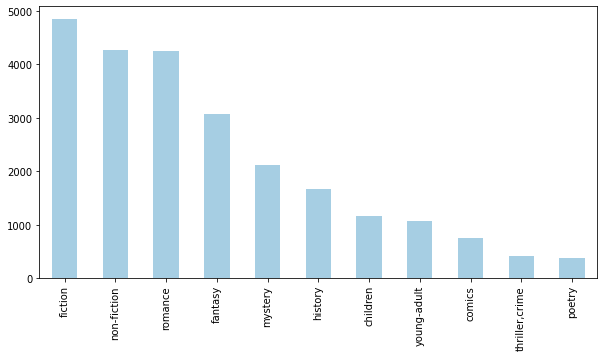

In [51]:
# Genre distribution
meta_goodreads['genres_book'].value_counts().plot(x = 'genre', y ='count', kind = 'bar', figsize = (10,5) ,colormap='Paired' )

## Author Exploration

In [52]:
meta_goodreads.author_name.value_counts()

Francine Pascal    34
Ann M. Martin      29
Agatha Christie    25
Terry Pratchett    24
James Patterson    24
                   ..
Bre Faucheux        1
Del Law             1
Lauren Gibaldi      1
James Strong        1
Natalie Herzer      1
Name: author_name, Length: 17644, dtype: int64

In [53]:
#For coming analysis we need to filter authors by their number of books & total ratings count, as for an author (with just one book and few ratings of 5), won't be the same for a popular author with avrage-rating of maybe 4.5.



In [54]:
def at_least_books(df, n):
    more_than_n = meta_goodreads['author_name'].value_counts().values >= n
    return df['author_name'].isin(df['author_name'].value_counts()[more_than_n == True].index)

In [55]:
meta_goodreads['author_average_rating'] = pd.to_numeric(meta_goodreads['author_average_rating'])
meta_goodreads['author_text_reviews_count'] = pd.to_numeric(meta_goodreads['author_text_reviews_count'])#object to numeric
meta_goodreads['author_ratings_count'] = pd.to_numeric(meta_goodreads['author_ratings_count'])

In [56]:
def at_least_ratings_count(df, n):
    return df.author_ratings_count >= n

In [57]:
at_least_books(meta_goodreads,5).head()

0    False
1    False
2    False
3    False
4    False
Name: author_name, dtype: bool

In [58]:
at_least_ratings_count(meta_goodreads, 200).head()

0    True
1    True
2    True
3    True
4    True
Name: author_ratings_count, dtype: bool

In [59]:
meta_goodreads['author_name'].value_counts().describe()

count    17644.000000
mean         1.361086
std          1.165268
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         34.000000
Name: author_name, dtype: float64

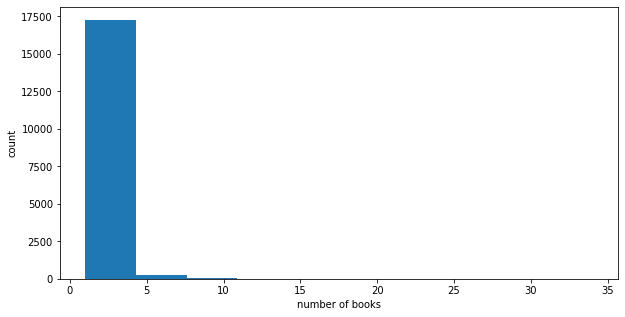

In [60]:
plt.figure(figsize=(10,5))
plt.hist(meta_goodreads.author_name.value_counts().values);
plt.xlabel('number of books');
plt.ylabel('count');

In [61]:
c1 = at_least_books(meta_goodreads, 10)
c2 = at_least_ratings_count(meta_goodreads, 200)

In [62]:
best_rating_authors = meta_goodreads[c1 & c2].groupby('author_name')['author_average_rating'].mean().sort_values(ascending=False)
best_rating_authors.head(15)

author_name
J.K. Rowling          4.44
George R.R. Martin    4.37
Brandon Sanderson     4.37
Rick Riordan          4.32
J.D. Robb             4.29
Kristen Ashley        4.29
Cassandra Clare       4.27
Robert Kirkman        4.26
Jim Butcher           4.26
Sherrilyn Kenyon      4.23
Arthur Conan Doyle    4.21
Douglas Adams         4.19
Edgar Allan Poe       4.18
Anonymous             4.15
Abbi Glines           4.15
Name: author_average_rating, dtype: float64

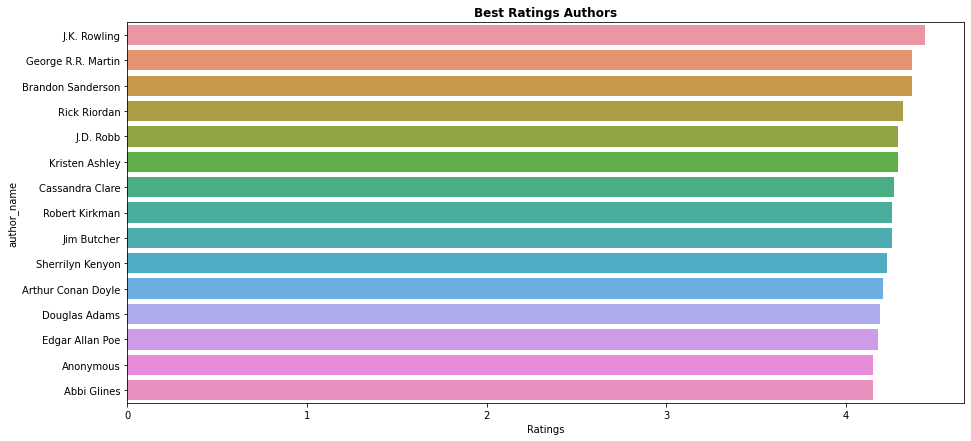

In [70]:
plot_authors_by(best_rating_authors, 'Best Ratings Authors', 'Ratings', 15)

In [71]:
def plot_authors_by(df,title, xlabel, n=15, ylabel='author_name', y_size=7):
    plt.figure(figsize=(15,y_size))
    ax = sns.barplot(x=df.head(n).values, y=df.head(n).index)
    plt.title(title, weight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [72]:
most_ratings_authors = meta_goodreads.groupby('author_name')['author_ratings_count'].sum().sort_values(ascending=False)
most_ratings_authors.head(15)

author_name
Stephen King          213334380
J.K. Rowling          185327210
James Patterson       113224032
Neil Gaiman            92893164
Terry Pratchett        78423504
Agatha Christie        63980975
Rick Riordan           61915520
Nora Roberts           59797997
J.R.R. Tolkien         57824343
Stephenie Meyer        53795256
Cassandra Clare        52802680
C.S. Lewis             49603873
George R.R. Martin     42772400
Suzanne Collins        37439188
Mark Twain             32702896
Name: author_ratings_count, dtype: int64

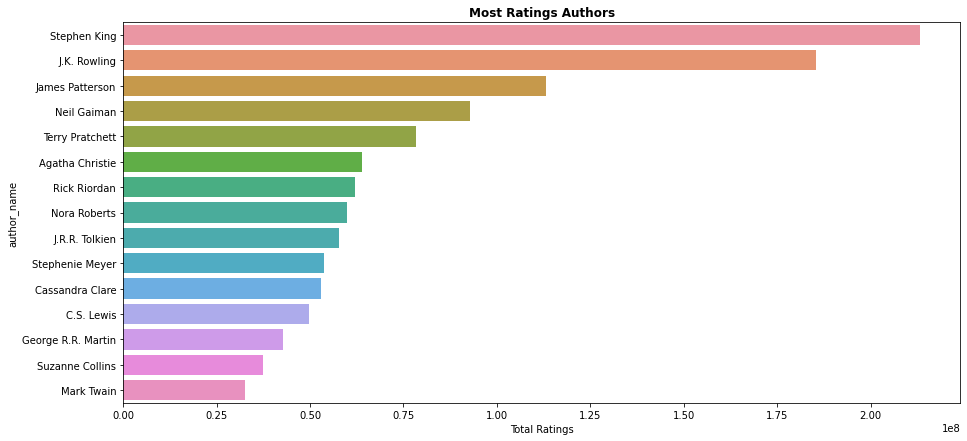

In [73]:
plot_authors_by(most_ratings_authors, 'Most Ratings Authors', 'Total Ratings', 15)

#Authors with Most Books

In [74]:
authors_most_with_books = meta_goodreads.author_name.value_counts()
authors_most_with_books.head(15)

Francine Pascal           34
Ann M. Martin             29
Agatha Christie           25
Terry Pratchett           24
James Patterson           24
R.L. Stine                21
Robert Kirkman            21
Neil Gaiman               21
Stephen King              20
Nora Roberts              19
Alexander McCall Smith    18
Anonymous                 18
Debbie Macomber           18
Arthur Conan Doyle        17
M.C. Beaton               16
Name: author_name, dtype: int64

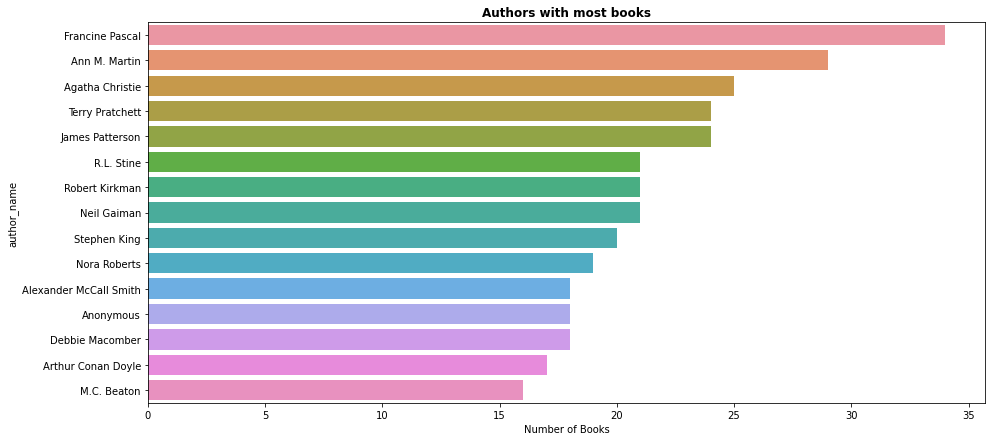

In [76]:
plot_authors_by(authors_most_with_books, 'Authors with most books', 'Number of Books', 15)

In [77]:
meta_goodreads.columns

Index(['book_id', 'text_reviews_count', 'average_rating', 'description',
       'link', 'url', 'image_url', 'ratings_count', 'title',
       'title_without_series', 'language', 'author_id',
       'author_average_rating', 'author_text_reviews_count', 'author_name',
       'author_ratings_count', 'genres_book'],
      dtype='object')

In [78]:
goodreads_book= meta_goodreads.drop(['author_average_rating', 'author_text_reviews_count','author_ratings_count'],axis=1)

In [79]:
goodreads_book

,book_id,text_reviews_count,average_rating,description,link,url,image_url,ratings_count,title,title_without_series,language,author_id,author_name,genres_book
0,19398490,2311,4.31,Winner of the Pulitzer Prize\nFrom the highly ...,https://www.goodreads.com/book/show/19398490-a...,https://www.goodreads.com/book/show/19398490-a...,https://images.gr-assets.com/books/1440903901m...,53342,All the Light We Cannot See,All the Light We Cannot See,en,28186,Anthony Doerr,fiction
1,12969594,241,4.06,An alternate cover of this ASIN can be found ...,https://www.goodreads.com/book/show/12969594-t...,https://www.goodreads.com/book/show/12969594-t...,https://images.gr-assets.com/books/1328309680m...,6390,The Orphan Master's Son,The Orphan Master's Son,en,36615,Adam Johnson,fiction
2,8664353,38878,4.39,"In her long-awaited new book, Laura Hillenbran...",https://www.goodreads.com/book/show/8664353-un...,https://www.goodreads.com/book/show/8664353-un...,https://images.gr-assets.com/books/1327861115m...,504961,"Unbroken: A World War II Story of Survival, Re...","Unbroken: A World War II Story of Survival, Re...",en,30913,Laura Hillenbrand,non-fiction
3,6452796,2930,3.95,Forget everything you thought you knew about h...,https://www.goodreads.com/book/show/6452796-drive,https://www.goodreads.com/book/show/6452796-drive,https://s.gr-assets.com/assets/nophoto/book/11...,58428,Drive: The Surprising Truth About What Motivat...,Drive: The Surprising Truth About What Motivat...,en,96150,Daniel H. Pink,non-fiction
4,178186,26,3.87,An autobiographical memoir revealing the tradi...,https://www.goodreads.com/book/show/178186.The...,https://www.goodreads.com/book/show/178186.The...,https://s.gr-assets.com/assets/nophoto/book/11...,245,The Worlds of a Maasai Warrior: An Autobiography,The Worlds of a Maasai Warrior: An Autobiography,en,103752,Tepilit Ole Saitoti,non-fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24010,23228256,28,4.09,"From Brazil's most acclaimed young novelist, t...",https://www.goodreads.com/book/show/23228256-b...,https://www.goodreads.com/book/show/23228256-b...,https://images.gr-assets.com/books/1411183144m...,159,Blood-Drenched Beard,Blood-Drenched Beard,en,1169290,Daniel Galera,fiction
24011,30340824,45,4.33,Ten seconds can change everything.\nDaisy Conn...,https://www.goodreads.com/book/show/30340824-c...,https://www.goodreads.com/book/show/30340824-c...,https://images.gr-assets.com/books/1464920539m...,68,"Collateral Damage (Hidden Scars, #2)","Collateral Damage (Hidden Scars, #2)",en,3975855,A.M. Myers,romance
24012,33125385,29,4.40,Librarian Note: Alternate Cover Edition for ....,https://www.goodreads.com/book/show/33125385-u...,https://www.goodreads.com/book/show/33125385-u...,https://images.gr-assets.com/books/1480090010m...,93,Untouched (Untouched #1),Untouched (Untouched #1),en,8577407,Lilly Wilde,romance
24013,22798607,3,3.90,"In his debut collection, Christian Winn throws...",https://www.goodreads.com/book/show/22798607-n...,https://www.goodreads.com/book/show/22798607-n...,https://images.gr-assets.com/books/1417750817m...,21,Naked Me,Naked Me,en,8409842,Christian Winn,fiction


### Goodreads Exploration and Visualisation

# **Top Rated Books**

In [80]:
goodreads_book['average_rating'] = pd.to_numeric(goodreads_book['average_rating'])
goodreads_book['ratings_count'] = pd.to_numeric(goodreads_book['ratings_count'])
goodreads_book['text_reviews_count'] = pd.to_numeric(goodreads_book['text_reviews_count'])#object to numeric

In [81]:
def plot_books_by(df, col, n_rows=10):
    plt.figure(figsize=(16,8))
    ax = sns.barplot(x=df[col].head(n_rows), y=df['title'].head(n_rows), data=df)
    plt.title('Best ' + str(n_rows) + ' books by ' + col.replace('_',' ').capitalize(), weight='bold')
    plt.xlabel('Score of ' + col)
    plt.ylabel('Book Title')    

In [82]:
important_columns = ['title','average_rating','ratings_count','text_reviews_count']

based on average rating

In [85]:
book_sorted_ratings = goodreads_book[goodreads_book['ratings_count']>=1000].sort_values('average_rating', ascending=False)
book_sorted_ratings[important_columns].head(10)

,title,average_rating,ratings_count,text_reviews_count
977,"March: Book Three (March, #3)",4.71,7100,1385
7414,"The Absolute Sandman, Volume Five",4.68,2275,35
23218,The Dresden Files Collection 7-12,4.66,1464,20
1742,The Power of Everyday Missionaries,4.63,1811,450
6744,"A Song of Ice and Fire, 5-Book Boxed Set: A Ga...",4.63,10680,183
3236,Harry Potter and the Deathly Hallows (Harry Po...,4.62,8470,657
13673,"Vampire Academy Collection (Vampire Academy, #...",4.61,30600,196
86,"Clockwork Princess (The Infernal Devices, #3)",4.59,69293,10861
8018,"The Disorderly Knights (The Lymond Chronicles,...",4.58,2811,155
4917,"An Act of Courage (Acts of Honor, #4)",4.58,1038,195


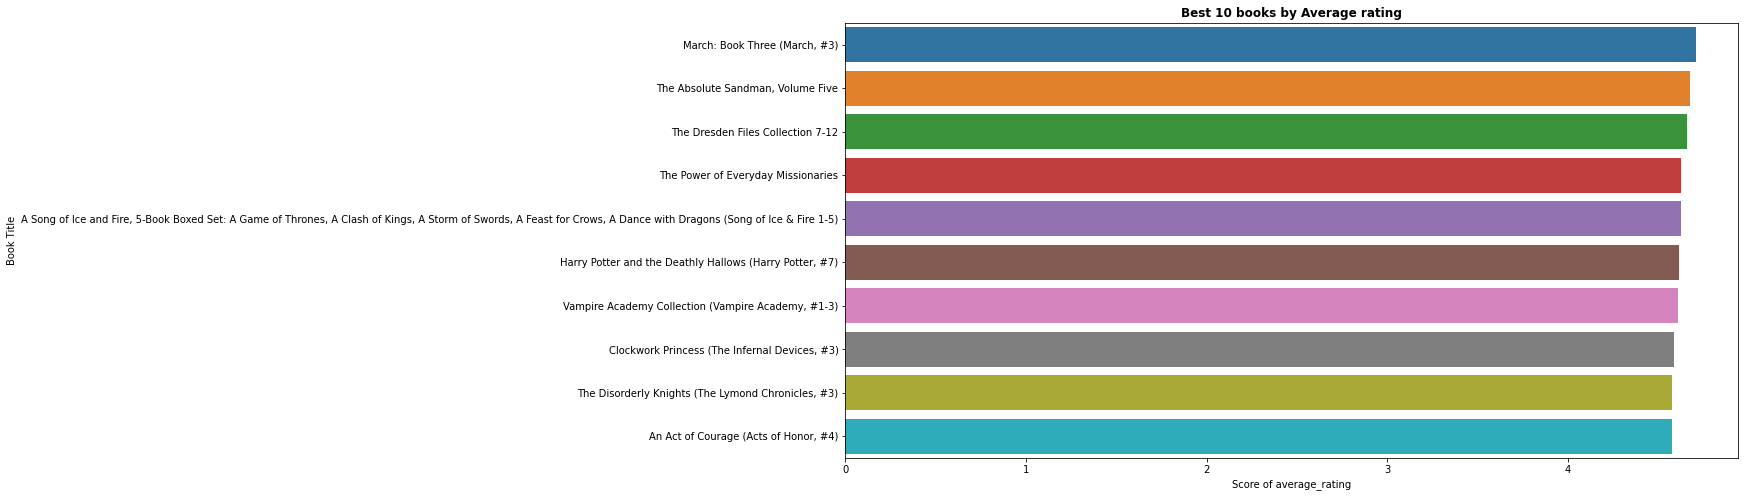

In [86]:
plot_books_by(book_sorted_ratings,'average_rating', 10)

based on rating count

In [88]:
book_sorted_ratings_count = goodreads_book.sort_values('ratings_count', ascending=False)
book_sorted_ratings_count[important_columns].head(15)

,title,average_rating,ratings_count,text_reviews_count
146,"Bridget Jones's Diary (Bridget Jones, #1)",3.75,748926,6654
48,"The Girl Who Played with Fire (Millennium, #2)",4.22,575163,24868
2,"Unbroken: A World War II Story of Survival, Re...",4.39,504961,38878
93,The Five People You Meet in Heaven,3.90,453494,14324
381,The Name of the Wind (The Kingkiller Chronicle...,4.55,416634,23413
174,"Shiver (The Wolves of Mercy Falls, #1)",3.78,360934,18330
209,Good Omens: The Nice and Accurate Prophecies o...,4.25,307430,11391
84,Anna and the French Kiss (Anna and the French ...,4.07,267364,20077
5,"The Amber Spyglass (His Dark Materials, #3)",4.07,196022,4926
66,The Paris Wife,3.79,195263,17667


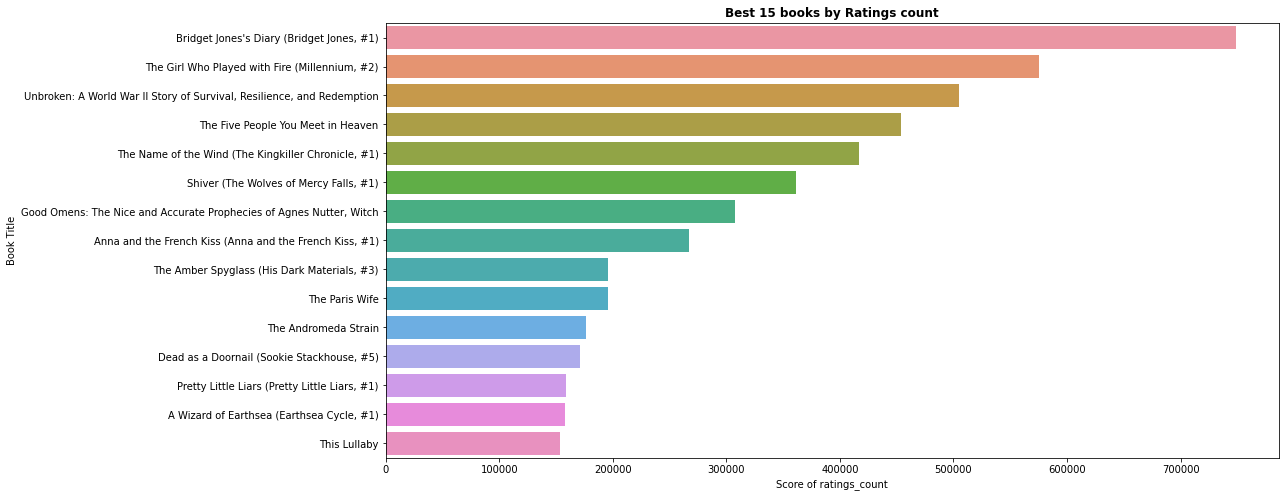

In [89]:
plot_books_by(book_sorted_ratings_count, 'ratings_count', 15)

based on text review count

In [90]:
book_sorted_reviews_count = goodreads_book[goodreads_book['ratings_count']>=1000].sort_values('text_reviews_count', ascending=False)
book_sorted_reviews_count[important_columns].head(15)

,title,average_rating,ratings_count,text_reviews_count
2,"Unbroken: A World War II Story of Survival, Re...",4.39,504961,38878
48,"The Girl Who Played with Fire (Millennium, #2)",4.22,575163,24868
381,The Name of the Wind (The Kingkiller Chronicle...,4.55,416634,23413
84,Anna and the French Kiss (Anna and the French ...,4.07,267364,20077
174,"Shiver (The Wolves of Mercy Falls, #1)",3.78,360934,18330
66,The Paris Wife,3.79,195263,17667
93,The Five People You Meet in Heaven,3.90,453494,14324
209,Good Omens: The Nice and Accurate Prophecies o...,4.25,307430,11391
86,"Clockwork Princess (The Infernal Devices, #3)",4.59,69293,10861
90,I Am the Messenger,4.09,94968,9971


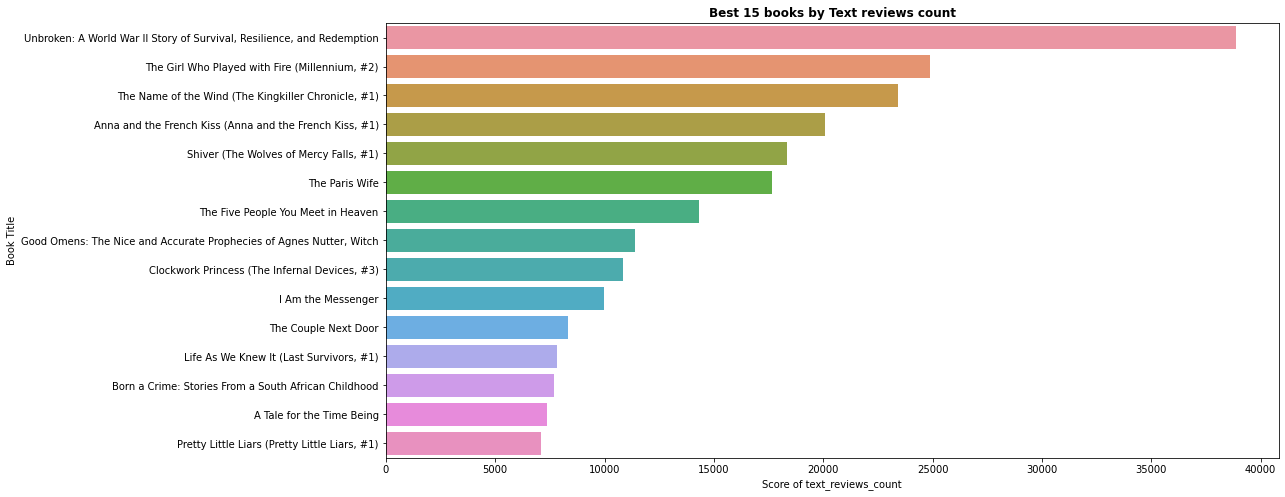

In [92]:
plot_books_by(book_sorted_reviews_count, 'text_reviews_count', 15)

## Top Scored Books

In [93]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
cols = ['ratings_count','average_rating']
scaler = MinMaxScaler()
df_normalized = goodreads_book[important_columns].copy()
df_normalized[cols] = scaler.fit_transform(df_normalized[cols])

In [95]:
df_normalized.head(10)

,title,average_rating,ratings_count,text_reviews_count
0,All the Light We Cannot See,0.862,0.071225,2311
1,The Orphan Master's Son,0.812,0.008532,241
2,"Unbroken: A World War II Story of Survival, Re...",0.878,0.674247,38878
3,Drive: The Surprising Truth About What Motivat...,0.790,0.078016,2930
4,The Worlds of a Maasai Warrior: An Autobiography,0.774,0.000327,26
5,"The Amber Spyglass (His Dark Materials, #3)",0.814,0.261737,4926
6,Personal Finance for Dummies,0.746,0.000037,2
7,Wish You Were Here,0.824,0.003123,544
8,"Illegal Contact (The Barons, #1)",0.868,0.003385,616
9,The Marriage Pact (Viral Series),0.784,0.000055,11


In [96]:
df_normalized['book_score'] = 0.5 * df_normalized['ratings_count'] + 0.5 * df_normalized['average_rating']

In [97]:
df_normalized_sorted_score = df_normalized.sort_values('book_score', ascending=False)
df_normalized_sorted_score.head(10)

,title,average_rating,ratings_count,text_reviews_count,book_score
146,"Bridget Jones's Diary (Bridget Jones, #1)",0.750,1.000000,6654,0.875000
48,"The Girl Who Played with Fire (Millennium, #2)",0.844,0.767984,24868,0.805992
2,"Unbroken: A World War II Story of Survival, Re...",0.878,0.674247,38878,0.776123
381,The Name of the Wind (The Kingkiller Chronicle...,0.910,0.556309,23413,0.733154
93,The Five People You Meet in Heaven,0.780,0.605526,14324,0.692763
209,Good Omens: The Nice and Accurate Prophecies o...,0.850,0.410494,11391,0.630247
174,"Shiver (The Wolves of Mercy Falls, #1)",0.756,0.481935,18330,0.618968
84,Anna and the French Kiss (Anna and the French ...,0.814,0.356997,20077,0.585498
5,"The Amber Spyglass (His Dark Materials, #3)",0.814,0.261737,4926,0.537869
137,"Dead as a Doornail (Sookie Stackhouse, #5)",0.802,0.227890,3253,0.514945


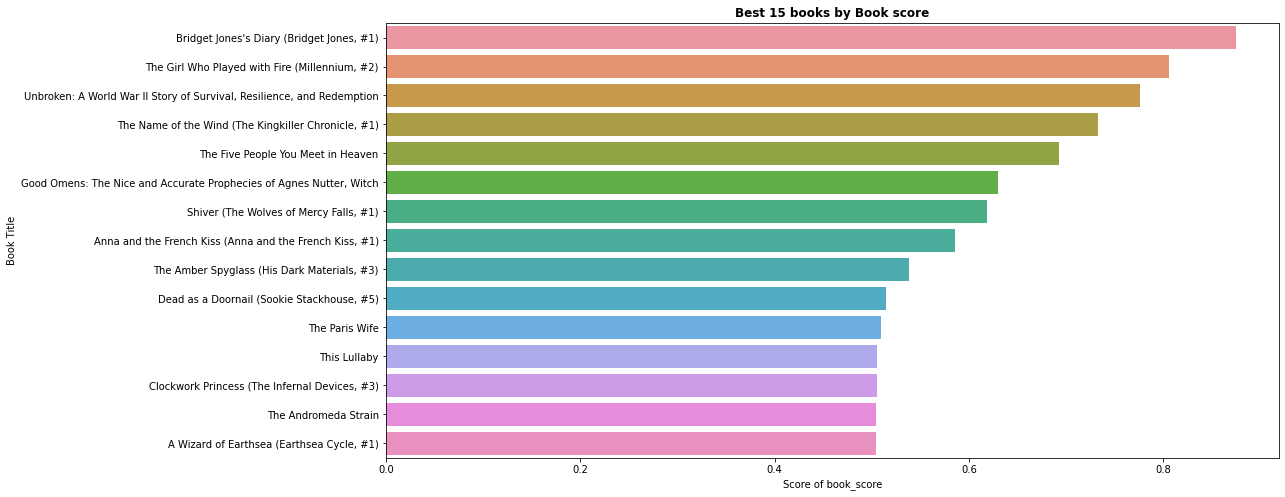

In [98]:
plot_books_by(df_normalized_sorted_score, 'book_score', 15)

In [99]:
goodreads_book.shape

(24015, 14)

In [100]:
goodreads_book.columns

Index(['book_id', 'text_reviews_count', 'average_rating', 'description',
       'link', 'url', 'image_url', 'ratings_count', 'title',
       'title_without_series', 'language', 'author_id', 'author_name',
       'genres_book'],
      dtype='object')

In [139]:
#pip install xlsxwriter

In [ ]:
#import xlsxwriter

In [ ]:
#writer = pd.ExcelWriter(r'nlp_dataset.xlsx', engine='xlsxwriter',options={'strings_to_urls': False})
#goodreads_book.to_excel(writer)
#writer.close()

## Review Dataset Exploration

In [102]:
review_book = pd.read_excel('review_dataset.xlsx')

In [103]:
review_book.head()

,Unnamed: 0,user_id,book_id,review_id,rating,review_text
0,0,8842281e1d1347389f2ab93d60773d4d,19398490,ea4a220b10e6b5c796dae0e3b970aff1,4,A beautiful story. It is rare to encounter a b...
1,1,8842281e1d1347389f2ab93d60773d4d,12969594,3e31f26463b536d280c5100e473feb83,3,This book takes us into the crazy world of Nor...
2,2,8842281e1d1347389f2ab93d60773d4d,8664353,da2d4cfce836a2c57ad55c38437aa692,5,"Wow. Amazing story, and well told - kept me up..."
3,3,8842281e1d1347389f2ab93d60773d4d,6452796,33f25b63a8a5be9b832f706c4c0a1cfc,3,Kareem recommends
4,4,8842281e1d1347389f2ab93d60773d4d,178186,66c9b63369a1ffd1489c61555531996a,5,"My safari guide gave this to me, saying the au..."


In [104]:
pip install scikit-surprise

     |████████████████████████████████| 11.8MB 6.0MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670898 sha256=11e7c4eceb3768afe5b4cf8e03170121a232173e5d90489198d1d9b3b14d8889
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [109]:
from surprise import Dataset, Reader

In [110]:
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(review_book[['user_id', 'book_id', 'rating']], reader)

In [111]:
print('Number of ratings: %d\nNumber of books: %d\nNumber of users: %d' % (len(review_book), len(review_book['book_id'].unique()), len(review_book['user_id'].unique())))

Number of ratings: 90424
Number of books: 24015
Number of users: 13962


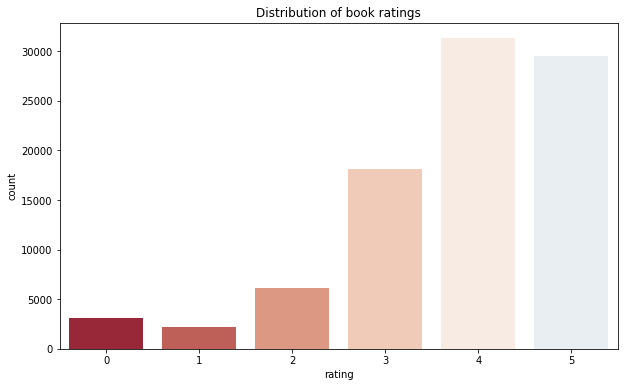

In [112]:
palette = sns.color_palette("RdBu", 10)

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='rating', data=review_book, palette=palette)
ax.set_title('Distribution of book ratings')

plt.show()

**Number of ratings per user**

In [116]:
ratings_per_user = review_book.groupby('user_id')['user_id'].count()
max(ratings_per_user)

373

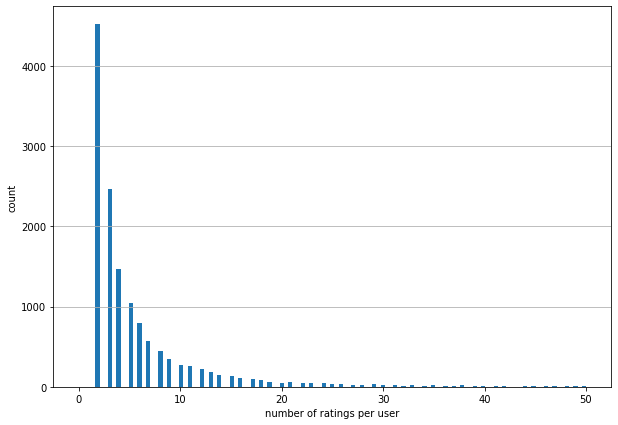

In [126]:
plt.figure(figsize=(10,7))
plt.hist(ratings_per_user ,bins='auto',range=[0,50]);
plt.grid(axis='y', alpha=1)
plt.xlabel('number of ratings per user')
plt.ylabel('count');

In [127]:
mean_rating_per_user = review_book.groupby('user_id')['rating'].mean()
mean_rating_per_user

user_id
000258cdb856ee85203323147d1223dd    3.500000
00063fbdeb226ca2ea6c0cb9c14ff618    3.400000
001bcd168bef7b3789288dc60338697d    3.500000
001eb567b3331c3ef3291a801d31be4a    5.000000
00204424763e8233c5f53f0729f2304f    3.400000
                                      ...   
ffecee234f84555b8598155449e0cdf4    2.666667
fff49a932c5752a63ab27efa4a651e16    4.000000
fffc9cfe8fd818f574c8c219b93274c0    4.562500
ffff601c0ffa34bd5ffbbf2caee30644    4.000000
ffff7cafdaf5196383cb2efca08fb6fe    4.166667
Name: rating, Length: 13962, dtype: float64

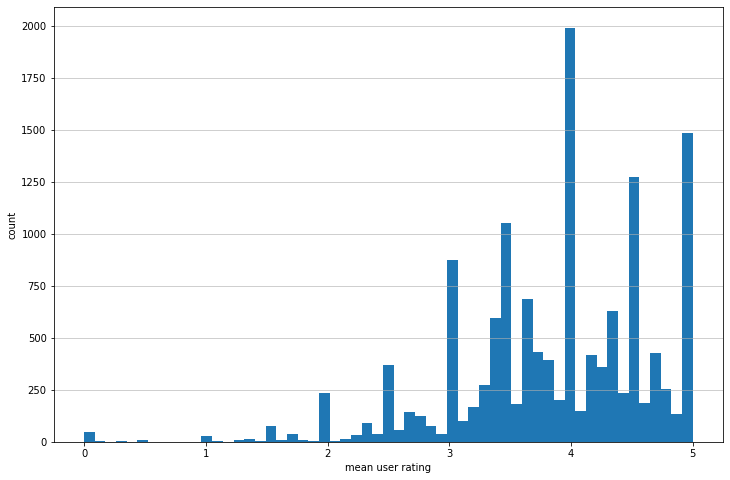

In [131]:
plt.figure(figsize=(12,8))
plt.hist(mean_rating_per_user, bins='auto');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('mean user rating')
plt.ylabel('count');

**Number of ratings per book**

In [132]:
ratings_per_book = review_book.groupby('book_id')['book_id'].count()
ratings_per_book

book_id
228          2
420          9
422          9
423          6
428         41
            ..
36393393     2
36434372     2
36438554     1
36460950     1
36469332     1
Name: book_id, Length: 24015, dtype: int64

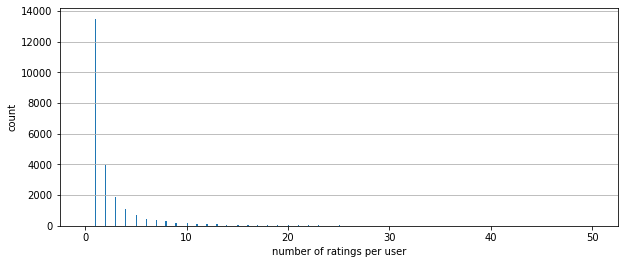

In [136]:
plt.figure(figsize=(10,4))
plt.hist(ratings_per_book ,bins='auto',range=[0,50]);
plt.grid(axis='y', alpha=1)
plt.xlabel('number of ratings per user')
plt.ylabel('count');

In [137]:
mean_rating_per_book = review_book.groupby('book_id')['rating'].mean()
mean_rating_per_book

book_id
228         4.500000
420         3.666667
422         3.888889
423         3.500000
428         3.609756
              ...   
36393393    4.500000
36434372    2.000000
36438554    4.000000
36460950    4.000000
36469332    3.000000
Name: rating, Length: 24015, dtype: float64

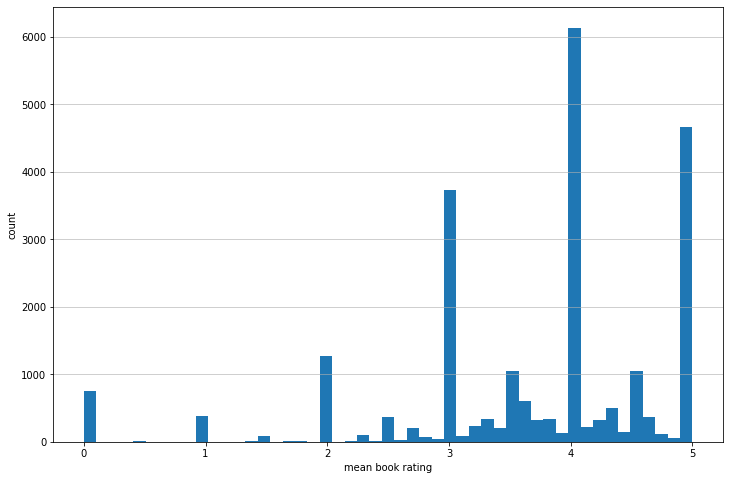

In [138]:
plt.figure(figsize=(12,8))
plt.hist(mean_rating_per_book, bins='auto');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('mean book rating')
plt.ylabel('count');